In [1]:
import pandas as pd
import numpy as np
%reload_ext autoreload
%autoreload 2


In [24]:
import numpy as np
from tensorflow.keras import layers, models, Model
from tensorflow.keras.applications.efficientnet import preprocess_input
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency

tf.compat.v1.disable_eager_execution ()

In [25]:
inputs = layers.Input(
        shape=(50, 320, 3)
    )
# use the downloaded and converted newest EfficientNet wheights
model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")
# Freeze the pretrained weights
model.trainable = False


# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.Dense(640, activation='relu')(x)
x = layers.Dense(320, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
top_dropout_rate = 0.5
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(1, name="pred")(x)
model = keras.Model(inputs, outputs, name="EfficientNet")

In [ ]:
model.summary()

In [21]:
img = load_img('image/0twftnbp_320x50.png', target_size=(50, 320))
#plt.imshow(img)
images=np.array(img)
X=preprocess_input(images)
# Convert to BGR, create input with batch_size: 1.
img_input = np.expand_dims(bgr_img, axis=0)
#pred = model.predict(X)
#print('Predicted {}'.format(pred))
img_input=img_input.astype(np.float32)


# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=None,
                    clone=True)
# Generate saliency map
saliency_map = saliency(score=lambda outputs: outputs[0][0],seed_input=img_input,smooth_samples=20,normalize_map=False )

# Render
plt.imshow(saliency_map.squeeze(), cmap='jet')
plt.show()

<generator object Saliency.__call__.<locals>.<genexpr> at 0x000002EF56E76F20>


AttributeError: 'Tensor' object has no attribute 'ndim'

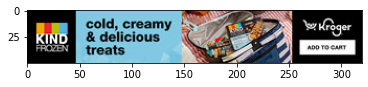

In [40]:
img = load_img('image/0twftnbp_320x50.png', target_size=(50, 320))
plt.imshow(img)